## Gender Recognition Neural Network:

In this notebook, we are going to practice handling 3 dimensional data, specifically, computer vision. In the data file, there are two further files, in which there are photos of men and women. Note that the images are cropped. In total, we have approximately 57,000 images: ~23,000 training images of each class and ~5,500 testing images of each class.

We are going to design a convolutional neural network that can distinguish the two sexes.

The requisite steps:
- Import the data
- standardise the data
- Shuffling the data
- Creating the model
- Fine-tuning the model
- Testing the model

## Importing necessary modules:

In [79]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.image import imread


import tensorflow
import tensorflow as tf


from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers, models, initializers
from keras.utils import image_dataset_from_directory, load_img, img_to_array, array_to_img

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import Image

import os
import random

In [80]:
tensorflow.__version__

'2.9.0'

## Data:

- Data comes from kaggle.

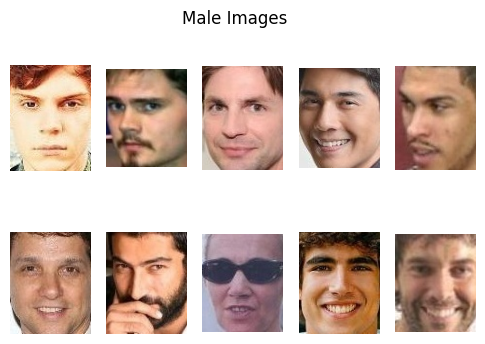

In [81]:
train_path = '../data/Training'
test_path = '..data/Testing'

plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Male Images')
    image_path = random.choice(os.listdir(train_path + '/male'))
    image = load_img(train_path + '/male/' + image_path)
    plt.axis ('off')
    plt.imshow(image)

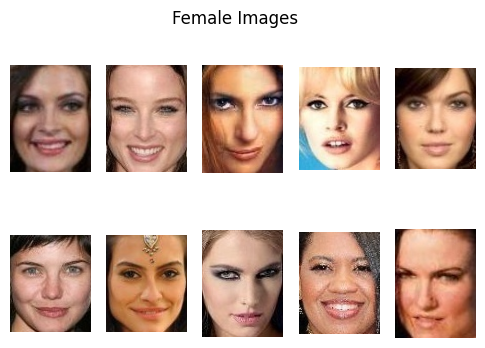

In [82]:
plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Female Images')
    image_path = random.choice(os.listdir(train_path + '/female'))
    image = load_img(train_path + '/female/' + image_path)
    plt.axis ('off')
    plt.imshow(image)


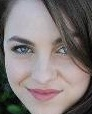

In [83]:
image = load_img('../data/Training/female/131422.jpg.jpg') 
image

In [84]:
print(type(image), image.format, image.mode, image.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (92, 114)


In [85]:
array = img_to_array(image)
array.shape

(114, 92, 3)

## Importing the entire data set:

- We change the shape of the photos to a 200x200x3 image.
- There are two labels: 0 denotes women and 1 denotes men.

In [86]:
train_set = image_dataset_from_directory('../data/Training', label_mode =  'binary', image_size = (200, 200), batch_size = 64, shuffle = True)
test_set = image_dataset_from_directory('../data/Testing', label_mode =  'binary', image_size = (200, 200), batch_size = 64, shuffle = True)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


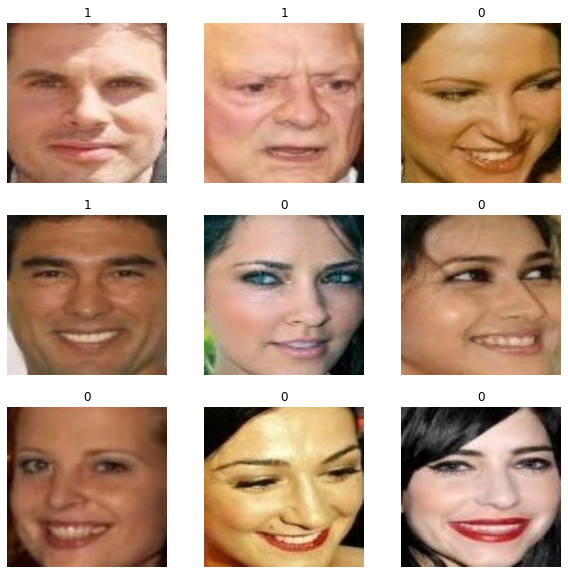

In [87]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [88]:
print(train_set.class_names)

['female', 'male']


## Creating the model:

In [89]:
kernel_size=(3,3) # The size of kernel

model = models.Sequential(
    [
        layers.Rescaling(1.0/255, input_shape = (200, 200, 3)),    
        layers.Conv2D(64, kernel_size, padding="same", activation = 'relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size, activation='relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size, activation='relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, kernel_size, activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, kernel_size, activation='relu'), 
        layers.MaxPooling2D((2,2)),
               
        layers.Flatten(),
        layers.Dense(256, activation="relu"),  
        layers.Dense(64, activation="relu"),  
        layers.Dense(1, activation="sigmoid")
    ]
)
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_112 (Conv2D)         (None, 200, 200, 64)      1792      
                                                                 
 dropout_43 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 100, 100, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 98, 98, 64)        36928     
                                                                 
 dropout_44 (Dropout)        (None, 98, 98, 64)        0         
                                                     

## Training the model:

- We have reached an accuracy of 90% - could reach higher.

- Batch size: numebr of training examples in one iteration
- steps per epoch: the number of batches of samples to use in one epoch.
- epoch: number of passes of the entire training dataset


In [92]:
history = model.fit(train_set, steps_per_epoch = 30, epochs = 30, validation_data = test_set, validation_steps = 50)

Epoch 1/30
30/30 [==============================] - 228s 8s/step - loss: 0.6219 - accuracy: 0.6474 - val_loss: 0.5770 - val_accuracy: 0.7372
Epoch 2/30
30/30 [==============================] - 204s 7s/step - loss: 0.5085 - accuracy: 0.7599 - val_loss: 0.5426 - val_accuracy: 0.7528
Epoch 3/30
30/30 [==============================] - 200s 7s/step - loss: 0.4361 - accuracy: 0.8062 - val_loss: 0.4237 - val_accuracy: 0.8303
Epoch 4/30
30/30 [==============================] - 201s 7s/step - loss: 0.3707 - accuracy: 0.8464 - val_loss: 0.3935 - val_accuracy: 0.8566
Epoch 5/30
30/30 [==============================] - 199s 7s/step - loss: 0.3682 - accuracy: 0.8427 - val_loss: 0.4089 - val_accuracy: 0.8444
Epoch 6/30
30/30 [==============================] - 198s 7s/step - loss: 0.3845 - accuracy: 0.8349 - val_loss: 0.4364 - val_accuracy: 0.8359
Epoch 7/30
30/30 [==============================] - 197s 7s/step - loss: 0.3293 - accuracy: 0.8651 - val_loss: 0.3753 - val_accuracy: 0.8794
Epoch 8/30
30

30/30 [==============================] - 127s 4s/step - loss: 0.1936 - accuracy: 0.9408 - val_loss: 0.2381 - val_accuracy: 0.9344


## Plotting accuracy and loss:

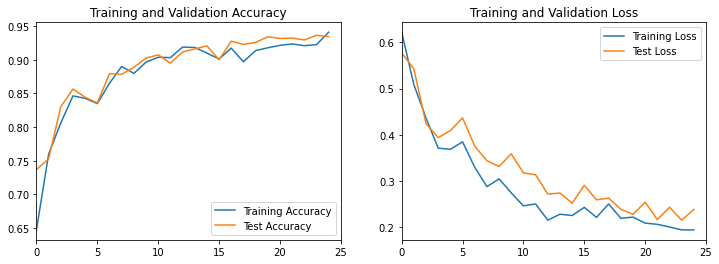

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(val_acc))
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, len(val_acc))

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend()
plt.xlim(0, len(val_acc))
plt.title('Training and Validation Loss')
plt.show()

In [94]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
